## Advertising Sales Channel Prediction 

Problem Description: 
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 


In [322]:
#import necessary libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [316]:
#import necessary model libraries:

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [252]:
#get the dataset into dataframe
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Exploratory Data Analysis

Let us proceed with the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test, check assumptions with the help of summary statistics and graphical representations. And summarize the main characteristics for model building.

In [100]:
#checking the rows and columns
df.shape

(200, 5)

In [253]:
#checking for information of independent variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [101]:
#checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:>

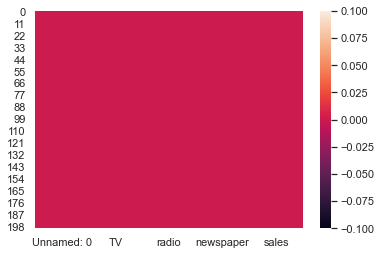

In [103]:
#missing values can be visualized using graphs
sns.heatmap(df.isnull())

In [129]:
#checking the data statistics
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Observations:

1. There is one unwanted column which indicates nothing but the index values again which we can remove.
2. There are no null values in the dataset.
3. There seems some skewness in the newspaper data which need to be handled.
4. There are 3 Independent variables and 1 target.

In [254]:
#removing the 'Unnamed: 0' column from dataset permanently
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Performing univariate and bivariate analysis using different visualization techniques

Text(0.5, 1.0, 'Graph of Independent Variables v/s Sales')

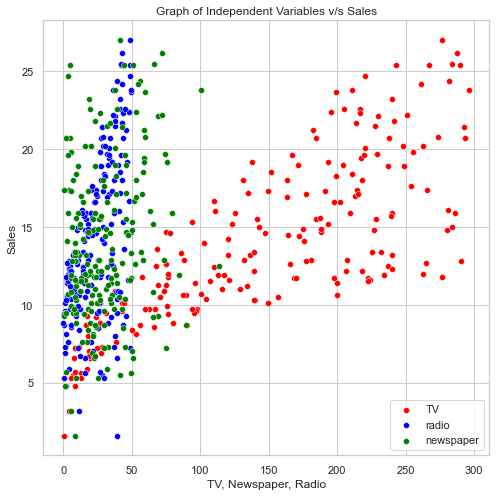

In [107]:
#plotting the relationship between individual features with target variables
#analysing the relation between dependent and independent variables

plt.figure(figsize=(8,8), facecolor='white')
sns.scatterplot(x=df['TV'],y=df['sales'],color ='red', )

sns.scatterplot(x=df['radio'],y=df['sales'],color ='blue')

sns.scatterplot(x=df['newspaper'],y=df['sales'],color ='green')


plt.legend(df.columns)
plt.xlabel("TV, Newspaper, Radio")
plt.ylabel("Sales")
plt.title("Graph of Independent Variables v/s Sales")

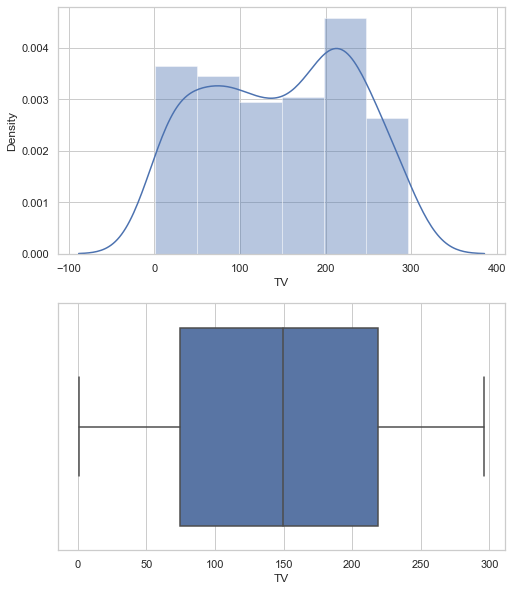

In [108]:
#checking the distribution of data over the columns
plt.figure(figsize=(8,10), facecolor='white')
ax = plt.subplot(2,1,1) 
sns.distplot(df['TV'])

ax = plt.subplot(2,1,2)
sns.boxplot(df['TV'],orient='v')
 
plt.show()

* Distplot displays data distribution of a variable against the density distribution.
* Box plot hepls in measuring how well distributed the data in a data set is.

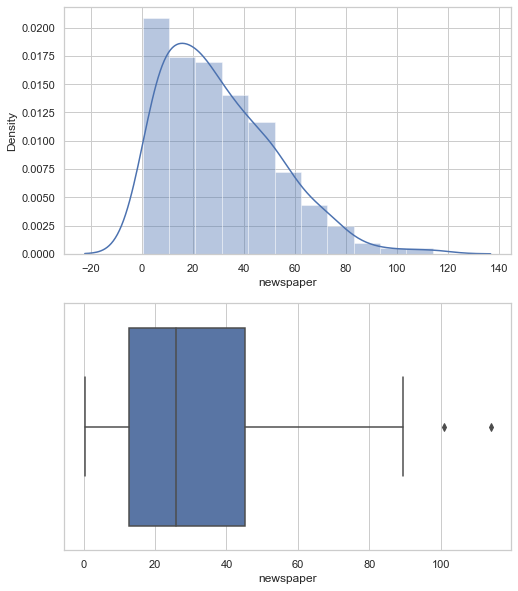

In [109]:
plt.figure(figsize=(8,10), facecolor='white')
ax = plt.subplot(2,1,1) 
sns.distplot(df['newspaper'])

ax = plt.subplot(2,1,2)
sns.boxplot(df['newspaper'],orient='v')
 
plt.show()

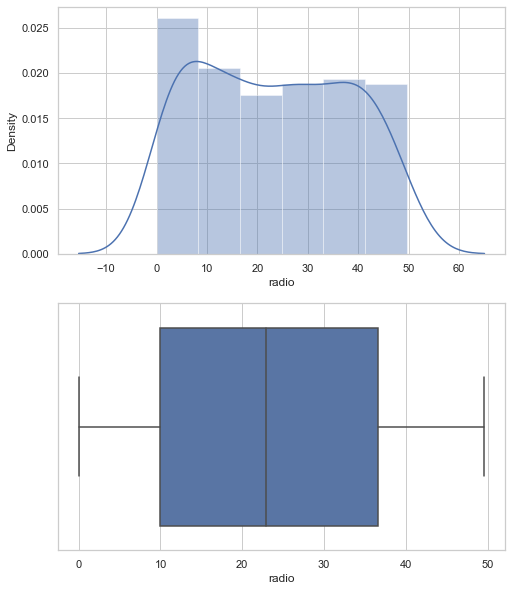

In [110]:
plt.figure(figsize=(8,10), facecolor='white')
ax = plt.subplot(2,1,1) 
sns.distplot(df['radio'])

ax = plt.subplot(2,1,2)
sns.boxplot(df['radio'],orient='v')
 
plt.show()

<Figure size 576x720 with 0 Axes>

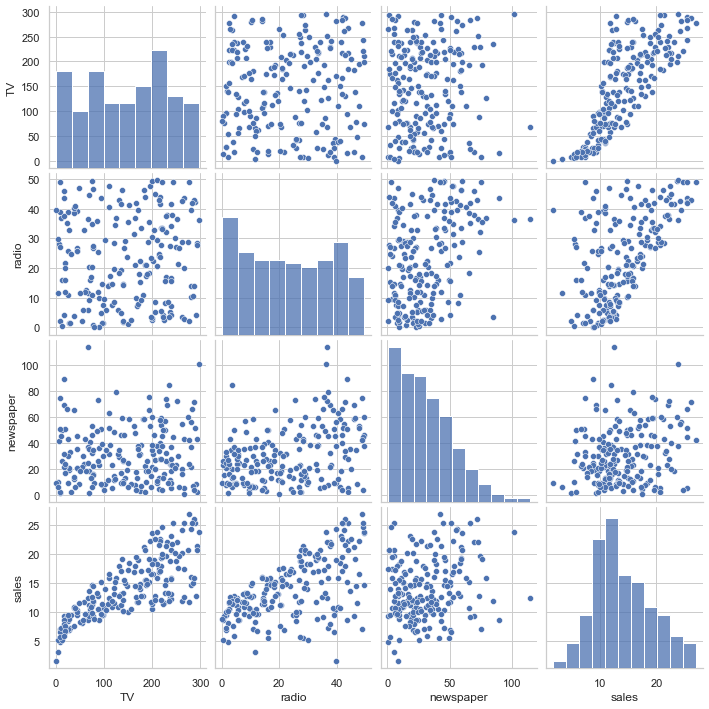

In [111]:
plt.figure(figsize=(8,10), facecolor='white')
sns.pairplot(df)
plt.show()

From above graphs,
1. We can clearly visualize that TV has dominant role in increasing the sales compared to Radio or newspaper. TV is in linear relationship with Sales, followed by Radio then newspaper.
2. The values are much scattered for independent variable, which indicates less correlation.

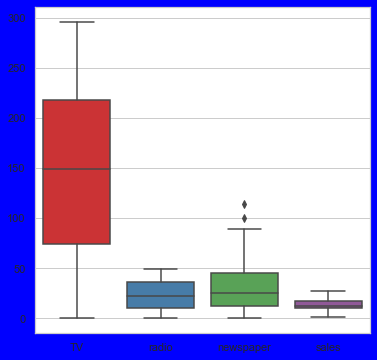

In [112]:
#Checking for Outliers using visualization plots
plt.figure(figsize=(6,6), facecolor='blue')
sns.boxplot(data=df, palette='Set1')
plt.show()

1. We can see there are no much outliers that can affect our data. We are much clear.
2. Skewness of newspaper to be handled.

In [255]:
#let us separate independent and dependent variables
X = df.drop(columns='sales')
y = df['sales']

In [256]:
#standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [150]:
#checking for the multicollinearity between the independent features
vif =pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [151]:
vif

,Features,VIF
0,TV,1.004611
1,radio,1.144952
2,newspaper,1.145187


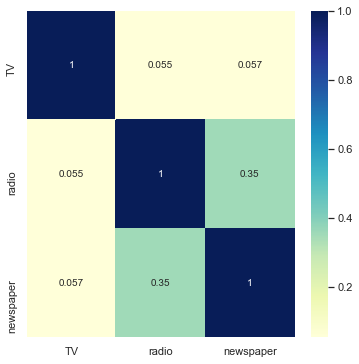

In [152]:
#generating the heatmaps to visualize multicollinearity
corr = X.corr()
plt.figure(figsize=(6,6), facecolor='white')
sns.heatmap(corr, annot=True,cmap='YlGnBu')
plt.show()

From the above observations, 
1. As the VIF values are less then 5 we can see that there is small VIF values indicates low correlation among variables under ideal conditions.
2. It is evident from the graph that, the independent and dependent variables are in good correlation range.

Checking for  skewness of the data

In [157]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper   -1.181239
sales        0.407571
dtype: float64

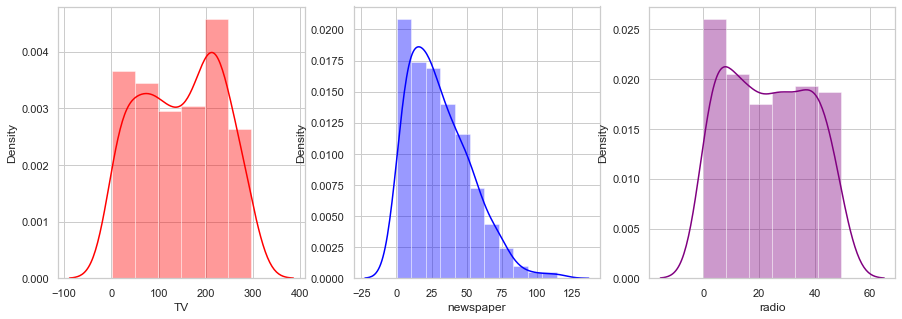

In [154]:
plt.figure(figsize=(15,5))
ax = plt.subplot(1,4,1)
sns.distplot(df['TV'],color='red')
ax = plt.subplot(1,4,2)
sns.distplot(df['newspaper'],color='blue')
ax = plt.subplot(1,4,3)
sns.distplot(df['radio'],color='purple')
ax = plt.subplot(1,4,4)
sns.distplot(df['sales'],color='green')
plt.show()

In [257]:
#applying log transformation
df['newspaper']=np.log(df['newspaper'])

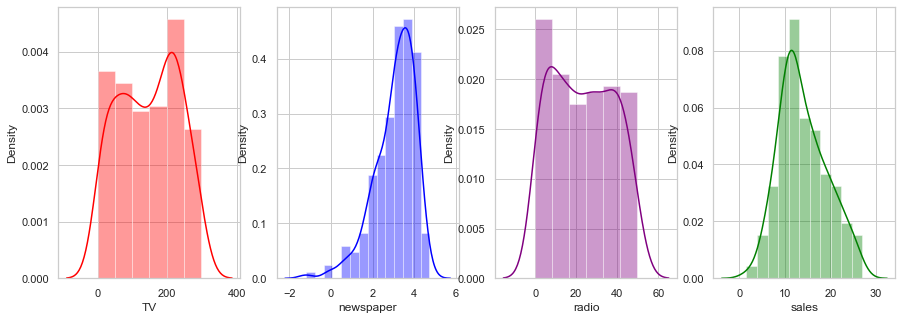

In [162]:
#visualizing the data after reducing the skewness
plt.figure(figsize=(15,5))
ax = plt.subplot(1,4,1)
sns.distplot(df['TV'],color='red')
ax = plt.subplot(1,4,2)
sns.distplot(df['newspaper'],color='blue')
ax = plt.subplot(1,4,3)
sns.distplot(df['radio'],color='purple')
ax = plt.subplot(1,4,4)
sns.distplot(df['sales'],color='green')
plt.show()

## Model Building
### 1. Linear Regression:
Splitting the data set into train test datasets

In [192]:
#Selecting the best random state to get maximum accuracy.
m_acc=0
m_RS=0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=i)
    lr= LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    acc = r2_score(y_test, pred)
    if acc > m_acc:
        m_acc= acc
        m_RS=i
print("The max accuracy is",m_acc, 'seen for random state:',i)

The max accuracy is 0.9329679186406996 seen for random state: 99


In [193]:
#selecting 99 as randomstate as we got best result
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=99)

In [329]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

*******************Results********************
The r2 score is: 0.9175057618627588
The mean absolute error 1.1800573313063336
The mean squared error 2.0630782729801593
root mean square error 1.4363419763343823
The cross validation score 0.8871063495438435

*****************XXXXXXXXXXX********************


In [232]:
#applying GridsearchCV to improve accuracy
par_grid =  {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_lm = GridSearchCV(estimator=lm, param_grid=par_grid, cv=5,n_jobs=1, verbose=1)

grid_lm.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LinearRegression(normalize=True), n_jobs=1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=1)

In [233]:
#predicting the results
print("The best estimators:", grid_lm.best_estimator_)
print("The best score:", grid_lm.best_score_)
print("The best parameters:", grid_lm.best_params_)

The best estimators: LinearRegression(normalize=True)
The best score: 0.8695081984046105
The best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [335]:
#RE INSTANTIATING WITH BEST PARAMETERS
grid_lm = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
grid_lm.fit(X_train, y_train)
y_pred1 = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred1))
print('The mean absolute error', mean_absolute_error(y_test, y_pred1))
print('The mean squared error', mean_squared_error(y_test, y_pred1))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred1)))
cv = cross_val_score(grid_lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

*******************Results********************
The r2 score is: 0.9175057618627588
The mean absolute error 1.1800573313063336
The mean squared error 2.0630782729801593
root mean square error 1.4363419763343823
The cross validation score 0.8871063495438436

*****************XXXXXXXXXXX********************


### Lasso Regularization

In [226]:
#USING LASSO REGULARIZATION
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [330]:
pred = lasso.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, pred))
print('The mean absolute error', mean_absolute_error(y_test, pred))
print('The mean squared error', mean_squared_error(y_test, pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, pred)))
cv = cross_val_score(lasso, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

*******************Results********************
The r2 score is: 0.8435843627622954
The mean absolute error 1.4342153986361934
The mean squared error 3.9117605062622673
root mean square error 1.9778171063731518
The cross validation score 0.8882007416256036

*****************XXXXXXXXXXX********************


In [288]:
#applying GridsearchCV to improve accuracy
param = {'alpha': np.arange(0.0001,0.1,0.001)}
grid_lass= GridSearchCV(estimator=lasso,param_grid=param,n_jobs=2,cv=5,verbose=2)

grid_lass.fit(X_train,y_train)
pred1 = grid_lass.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, pred1))
print("The best score:", grid_lass.best_score_)

print("\n*****************XXXXXXXXXXX********************")
                        

Fitting 5 folds for each of 100 candidates, totalling 500 fits
*******************Results********************
The r2 score is: 0.9196063288432903
The best score: 0.8721871102220129

*****************XXXXXXXXXXX********************


### 2. KNN Algorithm

In [331]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train,y_train)
y_pred = knn_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(knn_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")


*******************Results********************
The r2 score is: 0.9043544588943169
The mean absolute error 1.0332
The mean squared error 2.3919759999999997
root mean square error 1.5466014354060325
The cross validation score 0.9085710686189529

*****************XXXXXXXXXXX********************


In [302]:
#applying GridsearchCV to improve accuracy
param = {'algorithm':['kd_tree'], 
         'n_neighbors':[3,2,4,6,8,10,14,7,11]}
grid_knn = GridSearchCV(estimator=knn_reg, param_grid=param)
grid_knn.fit(X_train,y_train)

grid_knn.fit(X_train,y_train)

pred1 = grid_knn.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, pred1))
print("The best score:", grid_knn.best_score_)

print("\n*****************XXXXXXXXXXX********************")

*******************Results********************
The r2 score is: 0.9088699174001298
The best score: 0.9133029282584472

*****************XXXXXXXXXXX********************


### 3. Random Forest Regressor

In [332]:
random_reg = RandomForestRegressor()
random_reg.fit(X_train,y_train)
y_pred = random_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(random_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")


*******************Results********************
The r2 score is: 0.9822136366958836
The mean absolute error 0.5220200000000006
The mean squared error 0.4448148200000011
root mean square error 0.6669443904854445
The cross validation score 0.9757328946886338

*****************XXXXXXXXXXX********************


In [312]:
#applying RandomsearchCV to improve accuracy
#hyperparameter 
n_estimator = [int(x) for x in np.linspace(start=10, stop=120,num=10)]

#number of features to be considered at each split
max_features = ['auto','sqrt']

#max number of tree
max_depth=[int(x) for x in np.linspace(5,50,num=6)]

#minimum number of samples for split
min_samples_split = [2,5,3,7,8,4]

#min number of samples for leaf split
min_samples_leaf = [1,3,2,5,7,8,4,12,15,17,9,20]

param = {'n_estimators':n_estimator, 'max_features':max_features, 'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}

In [315]:
random_cv = RandomizedSearchCV(estimator=random_reg, param_distributions=param, n_iter=4, cv=5, n_jobs=2,verbose=2)
random_cv.fit(X_train, y_train)
pred = random_cv.predict(X_test)


print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, pred))
print("The best score:", random_cv.best_score_)

print("\n*****************XXXXXXXXXXX********************")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
*******************Results********************
The r2 score is: 0.9781799276587047
The best score: 0.9640132683388112

*****************XXXXXXXXXXX********************


### 4.  Gradient Boosting Regressor

In [333]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train,y_train)
y_pred = gb_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(gb_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")


*******************Results********************
The r2 score is: 0.977463688502363
The mean absolute error 0.5848100712202365
The mean squared error 0.5636051153843991
root mean square error 0.7507363820838837
The cross validation score 0.977406193743396

*****************XXXXXXXXXXX********************


In [321]:
#applying RandomsearchCV to improve accuracy

params = {"n_estimators":[50,100,200,300,400,500,600,700,800,900],"max_depth":[3,4,5,6,7,8,9,10,12,15],"min_samples_split":[2,5,8,10,12,15,18,20,22],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7,8],"learning_rate":[0.01,0.05,0.1,0.3,0.5,0.6,0.7]}

random_gb = RandomizedSearchCV(gb_reg,param_distributions=params,n_iter=30,n_jobs=2,cv=6,verbose=2)
random_gb.fit(X_train,y_train)
          
pred = random_gb.predict(X_test)


print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, pred))
print("The best score:", random_gb.best_score_)

print("\n*****************XXXXXXXXXXX********************")

Fitting 6 folds for each of 30 candidates, totalling 180 fits
*******************Results********************
The r2 score is: 0.9829605848992362
The best score: 0.9735881462301323

*****************XXXXXXXXXXX********************


## BEST MODEL:
The model with least diference in r_2 score and cross validation score is the best model
Here Gradient boosting model is giving the least difference, Hence we can select this model to predict the data.


In [343]:
y_pred = gb_reg.predict(X_test)
print("The accuracy score of model is:",r2_score(y_test, y_pred)*100)

The accuracy score of model is: 97.7463688502363


### Saving the model:

In [344]:
#save the model
import pickle

#open a file where you want to store the dat
file = open('Advertising_regressor.pkl','wb')

In [345]:
#dump the information to the file
pickle.dump(gb_reg,file)